# Projet [SSC2026] : La dimension psychologique dans l'étude du complotisme

Marquer chaque article avec terminologie, sur les 10 dernières années articles avec termes psychologies ? (minds...) Identifier les termes est un travail à part entière. Utiliser bertopic pour cartographie terminologie termes psychologisants. Prendre articles tigger. Classement articles part psychologie, traitement évolution temporelle déjà fin.
Charger corpus active tigger et entraîner ml prédit bien ?
Expliquer démarche.

In [7]:
import yaml
with open('creds.yaml', 'r') as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

In [8]:
import requests
import time


keyword1 = "conspiracy theories"
keyword2 = "théorie du complot"
per_page = 25     
max_results = None 

url = "https://api.openalex.org/works"

headers = {
    "Authorization": f"Bearer {config['token-openalex']}"
}

cursor = "*"
all_works = []
n = 0

while True:
    params = {
        # Ajout du filtre language:en|fr pour ne garder que l'anglais et le français
        "filter": f'title_and_abstract.search:"{keyword1}"|"{keyword2}",type:article,language:en|fr',
        "per-page": 100,
        "select": "id,title,abstract_inverted_index,publication_year,language,primary_location",
        "cursor": cursor
    }

    r = requests.get(url, headers=headers, params=params)
    r.raise_for_status()
    data = r.json()

    results = data.get("results", [])
    total = data["meta"]["count"]

    if not results:
        break

    all_works.extend(results)
    n += len(results)

    print(f"Fetched {n} / {total} (cursor={cursor})")

    if max_results is not None and n >= max_results:
        break

    cursor = data["meta"].get("next_cursor")
    if not cursor:
        break

    time.sleep(0.2)

print(f"\nDone. Collected {len(all_works)} works total.\n")


Fetched 100 / 6682 (cursor=*)
Fetched 200 / 6682 (cursor=IlsyMTQuOTkzNzcsIDE0MzAxNzkyMDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMTU0MTk4MTQ1OSddIg==)
Fetched 300 / 6682 (cursor=IlsxNTQuOTA0MjcsIDE0MDg0MDY0MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjE1MDMzNTc2MSddIg==)
Fetched 400 / 6682 (cursor=IlsxMjAuNDMzNDYsIDE2NzY3NjQ4MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XNDMyMTM3Njg3NyddIg==)
Fetched 500 / 6682 (cursor=Ils5OC4xMTI2NSwgMTY5MjIzMDQwMDAwMCwgJ2h0dHBzOi8vb3BlbmFsZXgub3JnL1c0Mzg2MDIxMDcxJ10i)
Fetched 600 / 6682 (cursor=Ils4MC4wMTA0NywgMTYxNjYzMDQwMDAwMCwgJ2h0dHBzOi8vb3BlbmFsZXgub3JnL1czMTM2ODgyNjUxJ10i)
Fetched 700 / 6682 (cursor=Ils2OS4wNTIyMSwgMTU3NjYyNzIwMDAwMCwgJ2h0dHBzOi8vb3BlbmFsZXgub3JnL1cyOTk1MjcyMzA0J10i)
Fetched 800 / 6682 (cursor=Ils1OS43NTc0OTIsIDE3MTMwNTI4MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XNDM5NDc5NzkxMiddIg==)
Fetched 900 / 6682 (cursor=Ils1My4zNzEzNiwgMTcwNjc0NTYwMDAwMCwgJ2h0dHBzOi8vb3BlbmFsZXgub3JnL1c0MzkxNzc5NTUzJ10i)
Fetched 1000 / 6682 (cursor=Ils0OC4wMDgzNywgMTYyMz

In [9]:
import pickle
import os

os.makedirs("data", exist_ok=True)

with open("data/all_works.pkl", "wb") as f:
    pickle.dump(all_works, f)

In [10]:
import pandas as pd

In [24]:
def reconstruct_abstract(inv_index):
    """
    Fonction pour réhydrater un abstract d'OpenAlex en gérant les trous dans l'index.
    """
    if not inv_index:
        return None

    # Déterminer la longueur maximale
    max_position = max(pos for positions in inv_index.values() for pos in positions)
    abstract_words = [None] * (max_position + 1)

    # Placer les mots aux bonnes positions
    for word, positions in inv_index.items():
        for pos in positions:
            abstract_words[pos] = word
            
    return " ".join([mot for mot in abstract_words if mot is not None])

In [25]:
reconstruct_abstract(all_works[200]["abstract_inverted_index"])

In [26]:
fields_to_keep = ["id","title","abstract_inverted_index","publication_year","primary_location"]

In [27]:
import json
with open("example.json", "w") as f:
    f.write(json.dumps(all_works[0]))

In [28]:
import pandas as pd

corpus = []

for work in all_works:
    element = []
    for field in fields_to_keep:
        element.append(work.get(field,None))
    corpus.append(element)
        

In [29]:
df = pd.DataFrame(corpus, columns = fields_to_keep)

In [30]:
df

id  \
0     https://openalex.org/W2905498624   
1     https://openalex.org/W2731369199   
2     https://openalex.org/W2315116440   
3     https://openalex.org/W2009369609   
4     https://openalex.org/W2016520072   
...                                ...   
6697  https://openalex.org/W4416286965   
6698  https://openalex.org/W4407096746   
6699  https://openalex.org/W3201154477   
6700  https://openalex.org/W4408306455   
6701  https://openalex.org/W1508959324   

                                                  title  \
0                     Understanding Conspiracy Theories   
1                 The Psychology of Conspiracy Theories   
2                         Belief in Conspiracy Theories   
3                Conspiracy Theories: Causes and Cures*   
4     The Effects of Anti-Vaccine Conspiracy Theorie...   
...                                                 ...   
6697  Res(s)sent(i)ment: Concept, Signifier, and Rec...   
6698  Pandemic Atmospheres: <i>Severance</i> and the...   
6699  SHAKY DIAGNOSES AND AMBIGUOUS TREATMENTS Comme...   
6700  The <i>Campaign Dial</i>: A Premier Lincoln Ca...   
6701  Battle for the War Department Rewards for the ...   

                                abstract_inverted_index  publication_year  \
0     {'Scholarly': [0], 'efforts': [1], 'to': [2], ...            2019.0   
1     {'What': [0, 21], 'psychological': [1, 24, 144...            2017.0   
2     {'A': [0], 'survey': [1], 'of': [2, 5, 15, 18,...            1994.0   
3     {'Many': [0], 'millions': [1], 'of': [2, 39, 4...            2008.0   
4     {'The': [0], 'current': [1], 'studies': [2], '...            2014.0   
...                                                 ...               ...   
6697  {'Contemporary': [0], 'tendencies': [1], 'in':...            2025.0   
6698  {'What': [0], 'happens': [1, 2575], 'when': [2...            2025.0   
6699  {'Michael': [0, 28], 'Sandel’s': [1, 367, 1164...            2021.0   
6700  {'Philadelphia's': [0], 'Campaign': [1, 65, 85...            2004.0   
6701  {'Almost': [0], 'two': [1, 103, 316, 544, 619,...            2011.0   

                                       primary_location  
0     {'id': 'doi:10.1111/pops.12568', 'is_oa': True...  
1     {'id': 'doi:10.1177/0963721417718261', 'is_oa'...  
2     {'id': 'doi:10.2307/3791630', 'is_oa': False, ...  
3     {'id': 'doi:10.1111/j.1467-9760.2008.00325.x',...  
4     {'id': 'doi:10.1371/journal.pone.0089177', 'is...  
...                                                 ...  
6697  {'id': 'doi:10.1215/17432197-11720288', 'is_oa...  
6698  {'id': 'doi:10.1525/rep.2025.169.6.85', 'is_oa...  
6699  {'id': 'doi:10.1162/ajle_a_00010', 'is_oa': Tr...  
6700  {'id': 'doi:10.5406/19457987.25.1.05', 'is_oa'...  
6701  {'id': 'doi:10.5406/19457987.32.2.03', 'is_oa'...  

[6702 rows x 5 columns]

In [31]:
df["abstract"] = df["abstract_inverted_index"].apply(reconstruct_abstract)
df['texte'] = (df['title'] + " " + df['abstract']).str.lower()

In [32]:
df.drop(columns=["abstract_inverted_index"],inplace=True)

In [33]:
import pandas as pd
import ast

def extraire_nom_journal(loc):
    """
    Fonction pour naviguer dans le dictionnaire primary_location 
    et récupérer le nom de la revue (display_name).
    """
    # Si la case est vide (NaN ou None)
    if pd.isna(loc) or not loc:
        return "Inconnu"
    
    # Si les données ont été sauvegardées puis rechargées (ex: depuis un CSV/Excel), 
    # elles peuvent être sous forme de texte. On les retransforme en dictionnaire.
    if isinstance(loc, str):
        try:
            loc = ast.literal_eval(loc)
        except (ValueError, SyntaxError):
            return "Inconnu"
            
    # Si c'est bien un dictionnaire, on cherche la source puis le display_name
    if isinstance(loc, dict):
        source = loc.get("source")
        if isinstance(source, dict):
            return source.get("display_name", "Inconnu")
            
    return "Inconnu"

#On applique la fonction sur la colonne pour créer la nouvelle colonne 'journal'
df['journal'] = df['primary_location'].apply(extraire_nom_journal)

display(df[['id', 'journal']].head())

id  \
0  https://openalex.org/W2905498624   
1  https://openalex.org/W2731369199   
2  https://openalex.org/W2315116440   
3  https://openalex.org/W2009369609   
4  https://openalex.org/W2016520072   

                                       journal  
0                         Political Psychology  
1  Current Directions in Psychological Science  
2                         Political Psychology  
3              Journal of Political Philosophy  
4                                     PLoS ONE

In [34]:
df.to_excel("data.xlsx")

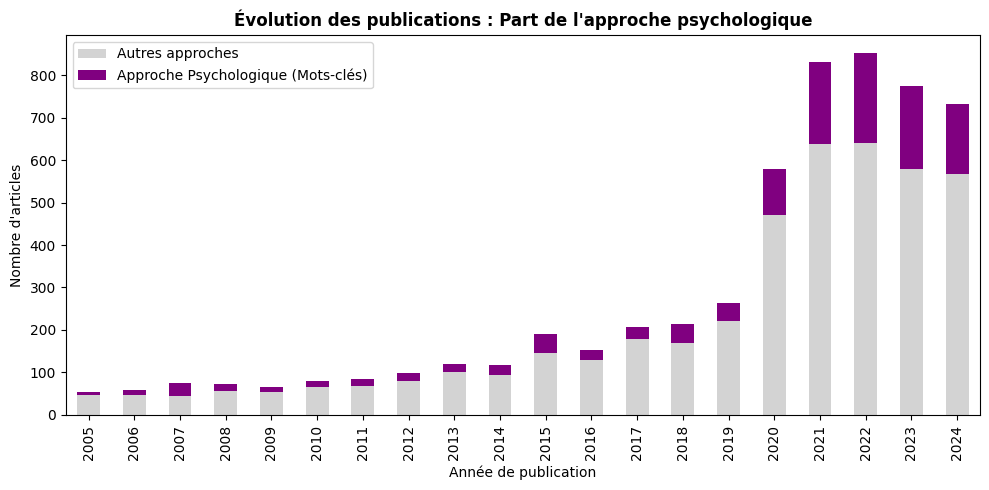

Volume total d'articles tagués 'Psychologie' : 1452 sur 6702


In [35]:
import matplotlib.pyplot as plt

# --- 1. Catégorisation par dictionnaire ---
# Définition d'un lexique propre à l'approche psychologique
psy_keywords = ['cognitive reflection', 'analytic thinking', 'intuitive thinking', 
        'heuristic', 'confirmation bias', 'motivated reasoning', 
        'pattern perception', 'apophenia', 'agency detection', 
        'teleological', 'epistemic', 'critical thinking', 'personality', 'trait', 'big five', 'openness', 'agreeableness', 
        'dark triad', 'narcissism', 'machiavellianism', 'psychopathy', 
        'self-esteem', 'dispositional', 'paranoia', 'schizotypy', 'delusion', 'anxiety', 
        'mental health', 'disorder', 'clinical', 'psychiatric', 'social identity', 'ingroup', 'outgroup', 'relative deprivation', 
        'need for closure', 'uncertainty', 'ostracism', 'existential threat', 
        'collective narcissism', 'social dominance', 'réflexion cognitive', 'pensée analytique', 'pensée intuitive',
        'heuristique', 'biais de confirmation', 'raisonnement motivé',
        'perception de motifs', 'apophénie', 'agentivité',
        'téléologique', 'épistémique', 'pensée critique', 'personnalité', 'ouverture', 'agréabilité',
        'triade noire', 'narcissisme', 'machiavélisme', 'psychopathie',
        'estime de soi', 'dispositionnel', 'paranoïa', 'schizotypie', 'délire', 'anxiété',
        'santé mentale', 'trouble', 'clinique', 'psychiatrique', 'identité sociale', 'endogroupe', 'exogroupe', 'privation relative',
        'besoin de clôture', 'incertitude', 'ostracisme', 'menace existentielle',
        'narcissisme collectif', 'dominance sociale']

# Création d'un masque booléen : True si un des mots est dans le texte
pattern_psy = '|'.join(psy_keywords)
df['is_psychology'] = df['texte'].str.contains(pattern_psy, na=False)

# --- 2. Visualisation de la part de l'approche psychologique ---
df['publication_year'] = df['publication_year'].fillna(0).apply(int)
df_chrono = df[(df['publication_year'] >= 2005) & (df['publication_year'] <= 2024)]
grouped = df_chrono.groupby(['publication_year', 'is_psychology']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 5))
grouped.plot(kind='bar', stacked=True, color=['lightgrey', 'purple'], ax=plt.gca())
plt.title("Évolution des publications : Part de l'approche psychologique", fontweight="bold")
plt.xlabel("Année de publication")
plt.ylabel("Nombre d'articles")
plt.legend(['Autres approches', 'Approche Psychologique (Mots-clés)'])
plt.tight_layout()
plt.savefig("evolution_publications_psy.png", dpi=300)
plt.show()
print(f"Volume total d'articles tagués 'Psychologie' : {df['is_psychology'].sum()} sur {len(df)}")

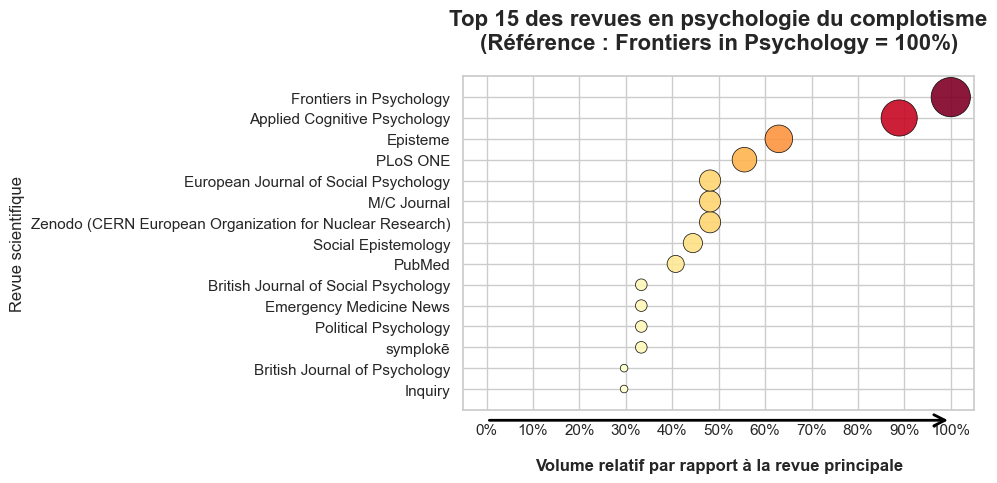

À noter : Le Top 5 concentre à lui seul 6.8% de TOUTES les publications psychologiques identifiées.


In [38]:
import seaborn as sns
import numpy as np

# 1. On s'assure de travailler sur le sous-corpus psychologique
df_psy = df[df['is_psychology'] == True].copy()

# 2. Comptage des articles par journal
comptage_journaux = df_psy['journal'].value_counts()

# On retire la catégorie "Inconnu" pour ne pas fausser l'analyse
if "Inconnu" in comptage_journaux.index:
    comptage_journaux = comptage_journaux.drop("Inconnu")

# Identification du leader (Frontiers in Psychology en principe) et de son volume
max_articles = comptage_journaux.max()
nom_leader = comptage_journaux.idxmax()

# Sélection du Top 50
top_15 = comptage_journaux.head(15)

# On prépare un DataFrame spécifique pour notre graphique
df_top15 = pd.DataFrame({
    'Journal': top_15.index,
    'Nombre': top_15.values,
    # Le calcul du % se fait par rapport au LEADER (Top 1 = 100%)
    'Pourcentage_Relatif': (top_15.values / max_articles) * 100
})

# On inverse l'ordre du DataFrame pour que le n°1 s'affiche TOUT EN HAUT de l'axe Y
df_top15 = df_top15.sort_values(by='Pourcentage_Relatif', ascending=True).reset_index(drop=True)

# 3. Création de la visualisation
# On passe sur une figure très haute (5 pouces) pour que les 15 journaux soient lisibles
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")

# Tracé du graphique en bulles (scatter plot)
ax = sns.scatterplot(
    data=df_top15,
    x='Pourcentage_Relatif',
    y='Journal',
    size='Pourcentage_Relatif', # Fait varier la taille de la bulle selon le %
    hue='Pourcentage_Relatif',  # Fait varier la couleur selon le %
    sizes=(30, 800),            # Taille minimale et maximale des bulles
    palette="YlOrRd",            # Le fameux gradient de couleur
    edgecolor="black",          # Contour des bulles pour faire propre
    alpha=0.9,                  # Opacité
    legend=False                # On désactive la légende par défaut
)

# Configuration de l'axe X pour afficher de 0 à 100
plt.xlim(-5, 105)
plt.xticks(np.arange(0, 110, 10), [f"{i}%" for i in range(0, 110, 10)])

# Ajout de la flèche personnalisée allant de 0 à 100% sous le graphique
# On crée un peu d'espace en bas de l'axe Y (Y=-1) pour dessiner la flèche
ax.set_ylim(-1, 15)
ax.annotate('', xy=(100, -1.5), xytext=(0, -1.5),
            arrowprops=dict(arrowstyle="->", color="black", lw=2, mutation_scale=20),
            annotation_clip=False)

# Titres et labels
plt.title(f"Top 15 des revues en psychologie du complotisme\n(Référence : {nom_leader} = 100%)", 
          fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Volume relatif par rapport à la revue principale", fontsize=12, fontweight="bold", labelpad=15)
plt.ylabel("Revue scientifique", fontsize=12)

# Ajustement pour ne pas couper les noms de journaux
plt.tight_layout()

# Sauvegarde et affichage
plt.savefig("bulles_journaux_psy.png", dpi=300)
plt.show()

# Petite stat bonus pour l'analyse dans le texte : 
# Calcul de la part ABSOLUE du top 5 par rapport à tout le corpus
top_5_absolu = top_15.head(5).sum() / comptage_journaux.sum() * 100
print(f"À noter : Le Top 5 concentre à lui seul {top_5_absolu:.1f}% de TOUTES les publications psychologiques identifiées.")

In [151]:
#pip install stopwordsiso

In [39]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from stopwordsiso import stopwords

language = "english" # or "french"
language_short = language[:2] # "en" or "fr"
docs = list(df_psy["abstract"])

vectorizer_model = CountVectorizer(stop_words = list(stopwords(language_short)))

topic_model = BERTopic(
    language = language,
    vectorizer_model = vectorizer_model,
)
topic_model.fit(documents=docs)

Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


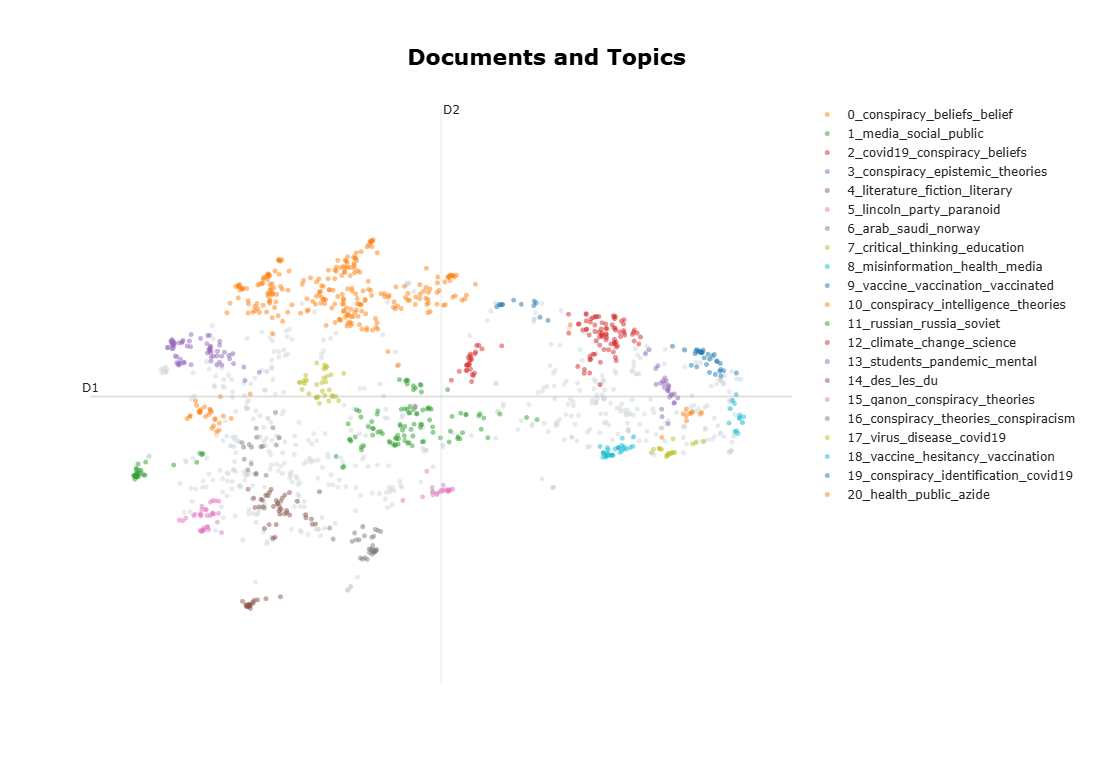

In [41]:
topic_model.visualize_documents(
        docs = docs,
        hide_annotations = True, 
)


## Pour aller plus loin

### Concernant la visualisation :

Il est encore nécessaire de retraiter les données afin d'enlever le cluster parasite "12_de_les_du".

### Concernant la réponse à la problématique :

Nous remarquons que les termes liés à la psychologie sont très peu présents dans les clusters de données. Il semble que l'approche n'est pas pertinente, il serait intéressant d'approfondir le sujet en regardant les contenus de l'article ou en étudiant plutôt au niveau méthodologique et donc d'adapter l'exploration en conséquence.
Une idée pourrait être de répertorier des méthodologies classiques employées en psychologie et de repérer si celles-ci se retrouvent dans l'abstract et/ou le contenu des articles.